Описание датасета: <br>
1 school — аббревиатура школы, в которой учится ученик <br>
2 sex — пол ученика ('F' - женский, 'M' - мужской) <br>
3 age — возраст ученика (от 15 до 22) <br>
4 address — тип адреса ученика ('U' - городской, 'R' - за городом) <br>
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3) <br>
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно) <br>
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) <br>
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее) <br>
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) <br>
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое) <br>
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое) <br>
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое) <br>
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) <br>
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) <br>
15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0) <br>
16 schoolsup — дополнительная образовательная поддержка (yes или no) <br>
17 famsup — семейная образовательная поддержка (yes или no) <br>
18 paid — дополнительные платные занятия по математике (yes или no) <br>
19 activities — дополнительные внеучебные занятия (yes или no) <br>
20 nursery — посещал детский сад (yes или no) <br>
21 higher — хочет получить высшее образование (yes или no) <br>
22 internet — наличие интернета дома (yes или no) <br>
23 romantic — в романтических отношениях (yes или no) <br>
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо) <br>
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого) <br>
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много) <br>
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо) <br>
28 absences — количество пропущенных занятий <br>
29 score — баллы по госэкзамену по математике <br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

math = pd.read_csv('stud_math.csv')
math.info()  # анализируем датафрейм, видим, что в колонках Аббревиатуры школы, Пола и Возраста нет пустых значений

pd.set_option('display.max_rows', 400)  # показывать больше строк
pd.set_option('display.max_columns', 30)  # показывать больше колонок

math.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [2]:
# Приведем к единому виду - переименуем некоторые колонки:
math = math.rename(columns={'famsize': 'family_size', 'Pstatus': 'marital_status', 'Medu': 'mother_edu', 'Fedu': 'father_edu',
                            'Mjob': 'mother_job', 'Fjob': 'father_job', 'schoolsup': 'school_sup', 'famsup': 'family_sup',
                            'famrel': 'family_rel', 'goout': 'go_out'})

array(['GP', 'MS'], dtype=object)

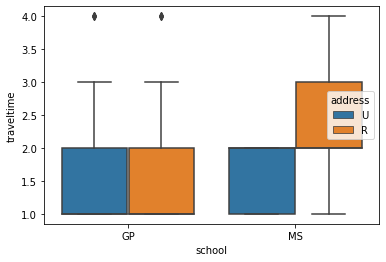

In [3]:
# определяем из скольких школ собраны данные, понимаем, что из 2 - 'GP' и 'MS'
display(math.school.unique())

# создадим датафрейм с колонками аббревиатуры школы, в которой учится ученик, типом адреса ученика ('U' - городской, 'R' - за городом) и
# временем в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) для последующего анализа
dist = math[['school', 'address', 'traveltime']]

sns.boxplot(x='school', y='traveltime', data=dist,
            hue='address')  # построим график

# из графика видим, что до школы GP одинаковое время пути что из города, что из за города. Что же касается школы MS - до него добираться из за города дольше.

# убираем колонки school и address, как избыточные данные, не влияющие на успеваемость по математике
math.drop(['school', 'address'], inplace=True, axis=1)

,age,mother_edu,father_edu,traveltime,studytime,failures,"studytime, granular",family_rel,freetime,go_out,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
mother_edu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
father_edu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
family_rel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
go_out,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


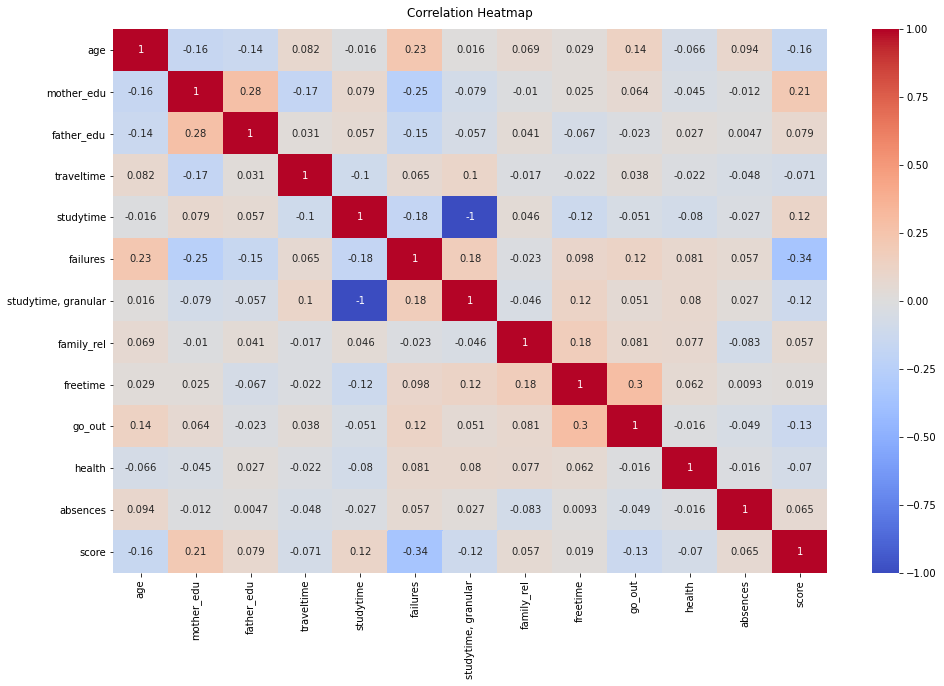

In [4]:
# смотрим матрицу корреляций:
display(math.corr())

# глаза разбегаются. Используем тепловую карту, чтобы визуально определить степени корреляции:
# указываем размер фигуры в дюймах, чтобы все значения влезли в квадратики
plt.figure(figsize=(16, 10))

# начертим тепловую карту
sns.heatmap(math.corr(), annot=True, cmap='coolwarm').set_title(
    'Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

# колонка studytime полностью коррелируется с колонкой studytime, granular(видим полную обратную зависимость)
# убираем избыточную колонку studytime, granular
math.drop(['studytime, granular'], inplace=True, axis=1)

In [5]:
# Анализ целевой переменной:
# смотрим пустые значения целевой переменной:
display(math[math.score.isna()])  # 6 значений
# видим, что 100 бальная система оценок, максимальная 100, минимальная 0, выбросов и аномалий нет
display(math.score.describe())
# удаляем строки с NaN в целевой переменной score в датафрейме, так как она может содержать только истинные метки
math = math.dropna(axis='index', how='any', subset=['score'])
math.reset_index(drop=True, inplace=True)

,sex,age,family_size,marital_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_sup,family_sup,paid,activities,nursery,higher,internet,romantic,family_rel,freetime,go_out,health,absences,score
201,F,16,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,F,18,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,F,19,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,F,18,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,M,19,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,M,19,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

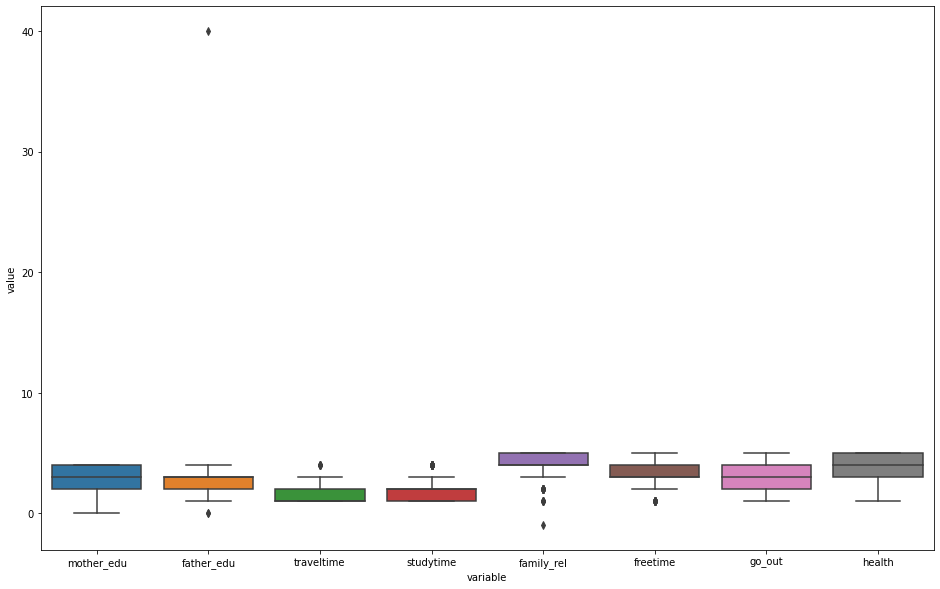

In [6]:
# Анализ номинативных переменных:
# строим графики, используя boxplot

plt.figure(figsize=(16, 10))
df = pd.DataFrame(data=math, columns=['mother_edu', 'father_edu', 'traveltime',
                                      'studytime', 'family_rel', 'freetime', 'go_out', 'health'])
# используем функцию melt (), которая разворачивает DataFrame из широкого формата в длинный
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [7]:
# Анализируем графики, видим аномальные выбросы по колонкам Образование отца (>4) и Семейные отношения (<0):

# ищем выбивающиеся значения образования отца
# (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
print('Выбивающиеся значения - ячейка    число: ',
      math.father_edu[math.father_edu > 4])
# предполагаем, что 40 - это была 4, просто 0 появился
math.loc[11, 'father_edu'] = 4  # исправляем значение ячейки

# ищем выбивающиеся значения по семейным отношениям
# (от 1 - очень плохо до 5 - очень хорошо)
print('Выбивающиеся значения - ячейка    число: ',
      math.family_rel[math.family_rel < 0])
# предполагаем, что -1 - это была 1, просто знак минуса появился
math.loc[25, 'family_rel'] = 1  # исправляем значение ячейки

Выбивающиеся значения - ячейка    число:  11    40.0
Name: father_edu, dtype: float64
Выбивающиеся значения - ячейка    число:  25   -1.0
Name: family_rel, dtype: float64


In [8]:
# выведем все колонки с неполными данными
nan_columns = math.columns[math.isna().any()]
for column in nan_columns:
    # смотрим кол-во значений в колонке, включая недостающие
    display(math.loc[:, column].value_counts(dropna=False))

GT3    255
LE3    107
NaN     27
Name: family_size, dtype: int64

T      308
NaN     45
A       36
Name: marital_status, dtype: int64

4.0    131
2.0    100
3.0     96
1.0     56
0.0      3
NaN      3
Name: mother_edu, dtype: int64

2.0    105
3.0     94
4.0     89
1.0     75
NaN     24
0.0      2
Name: father_edu, dtype: int64

other       127
services     98
at_home      58
teacher      55
health       32
NaN          19
Name: mother_job, dtype: int64

other       194
services     99
NaN          36
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

course        135
reputation    102
home          101
other          34
NaN            17
Name: reason, dtype: int64

mother    248
father     86
NaN        31
other      24
Name: guardian, dtype: int64

1.0    239
2.0     94
NaN     28
3.0     21
4.0      7
Name: traveltime, dtype: int64

2.0    189
1.0    103
3.0     63
4.0     27
NaN      7
Name: studytime, dtype: int64

0.0    290
1.0     48
NaN     22
2.0     15
3.0     14
Name: failures, dtype: int64

no     331
yes     49
NaN      9
Name: school_sup, dtype: int64

yes    216
no     135
NaN     38
Name: family_sup, dtype: int64

no     197
yes    153
NaN     39
Name: paid, dtype: int64

yes    192
no     183
NaN     14
Name: activities, dtype: int64

yes    297
no      77
NaN     15
Name: nursery, dtype: int64

yes    350
NaN     20
no      19
Name: higher, dtype: int64

yes    300
no      55
NaN     34
Name: internet, dtype: int64

no     235
yes    123
NaN     31
Name: romantic, dtype: int64

4.0    178
5.0     97
3.0     62
NaN     27
2.0     17
1.0      8
Name: family_rel, dtype: int64

3.0    152
4.0    110
2.0     63
5.0     37
1.0     18
NaN      9
Name: freetime, dtype: int64

3.0    126
2.0    101
4.0     81
5.0     51
1.0     23
NaN      7
Name: go_out, dtype: int64

5.0    137
3.0     88
4.0     60
1.0     47
2.0     42
NaN     15
Name: health, dtype: int64

0.0      110
2.0       60
4.0       52
6.0       30
8.0       20
10.0      17
12.0      12
14.0      12
NaN       11
16.0       7
3.0        7
7.0        6
5.0        5
18.0       5
20.0       4
1.0        3
22.0       3
9.0        3
13.0       2
15.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [9]:
# создадим функцию, которая будет вычислять моду в колонке и заменять недостающие значения на наиболее часто встречающиеся.
# Используем моду, так как практически все переменные качественные
# (количественная только одна - absences - кол-во пропущенных занятий, но и ее пропущенные значения лучше поменять на моду)
def fill_by_mode(df, column):
    mode = df[column].mode(dropna=False)[0]
    return df[column].fillna(mode)


for column in nan_columns:
    # применим функцию и заменим все недостающие значения на моду
    math.loc[:, column] = fill_by_mode(math, column)

# Да знаю я, что это не лучший вариант, но мне стало лениво и я слишком сильно закопался :)
# Тут можно было сделать еще, что к примеру, если кол-во отсутствующих номинативных значений больше 30,
# то не применять моду, а придумать другой вариант (какие-нибудь процентные соотношения и тп)
# И вообще надо следовать условию репрезентативности, но это будет ниже

In [10]:
math.info()  # вглянем еще раз на датафрейм. Видим, что недостающих значений не осталось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             389 non-null    object 
 1   age             389 non-null    int64  
 2   family_size     389 non-null    object 
 3   marital_status  389 non-null    object 
 4   mother_edu      389 non-null    float64
 5   father_edu      389 non-null    float64
 6   mother_job      389 non-null    object 
 7   father_job      389 non-null    object 
 8   reason          389 non-null    object 
 9   guardian        389 non-null    object 
 10  traveltime      389 non-null    float64
 11  studytime       389 non-null    float64
 12  failures        389 non-null    float64
 13  school_sup      389 non-null    object 
 14  family_sup      389 non-null    object 
 15  paid            389 non-null    object 
 16  activities      389 non-null    object 
 17  nursery         389 non-null    obj

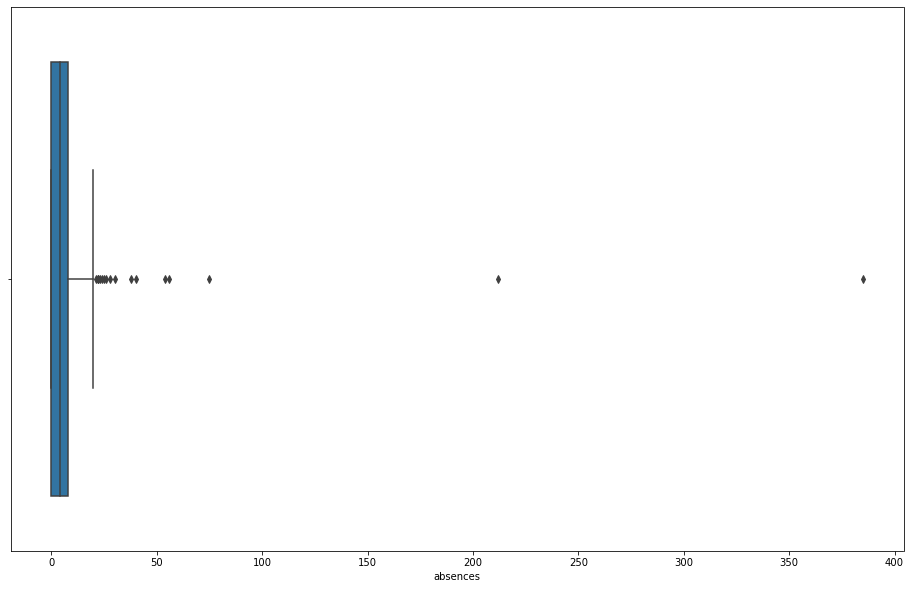

In [11]:
# у нас осталась еще одна неиследованная колонка absences — Количество пропущенных занятий
plt.figure(figsize=(16, 10))
sns.boxplot(x=math["absences"])
plt.show()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


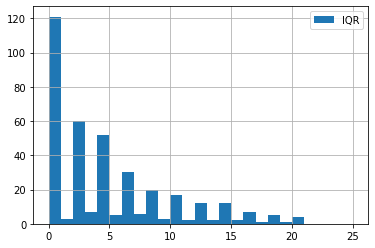

In [12]:
# Очень много выбросов. Посчитаем межвкартильный размах, 25-й перцентиль, 75-й перцентиль, границы выбросов
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

math.absences.loc[math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=25, range=(0, 25), label='IQR')  # нарисуем гистограмму

plt.legend()

In [13]:
# Посчитаем кол-во строк со значениями за границей выбросов:
# получаем 17 строк. Слишком много, чтобы просто выкинуть их
len(math[(math.absences > 20) | (math.absences < -12)])

17

In [14]:
# вычисляем медиану, для последующей замены значений находящихся за границей выбросов
math.absences.median()

4.0

In [15]:
# заменим значения, находящиеся за границей выбросов на значение медианы
math[(math.absences > 20) | (math.absences < -12)] = 4

In [ ]:
репрезентативность
paid
romantic
health
activities
absences?